# Description

 - TO-DO: We will classifier reviews as either positive or negative or neutral based on the message of the left  by the reviewer.
 
 - Data: Data is scrapped straight from the web. Data Scrapping is done in the notebook $\underline{\text{data_collection.ipynb}}$. The reviews are being made on TrustPilot about WorldRemit, a money transfer platform. Link to the pages where we scrapped data from: https://www.trustpilot.com/review/www.worldremit.com

# Import necessary packages

In [109]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import f1_score #f1 score to use it as and evaluation metric
import ast #to convert string into dictionary
from IPython.display import clear_output
from sklearn import svm #support vector machine classifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression #import logistic regression
from sklearn.tree import DecisionTreeClassifier #import Decision tree
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import seaborn as sb

# Pre-processing data

In [99]:

class Sentiment:
    NEGATIVE = "NEGATIVE"
    NEUTRAL = "NEUTRAL"
    POSITIVE = "POSITIVE"

class Review:
    def __init__(self, text, score):
        self.text = text
        self.score = score
        self.sentiment = self.get_sentiment()
        
    def get_sentiment(self):
        if self.score <= 2:
            return Sentiment.NEGATIVE
        elif self.score == 3:
            return Sentiment.NEUTRAL
        else: #Score of 4 or 5
            return Sentiment.POSITIVE
#     def __str__(self):
#         return  

### Load a sample data point

In [100]:
#Most of the cleaning was done during the data web scraping

with open("./data/Worldremit/reviews.txt") as fp:
    for index,line in enumerate(fp):

        review = ast.literal_eval(line)
        print(review)
        break


{'socialShareUrl': 'https://www.trustpilot.com/reviews/5ed0251025e5d20a88a2057d', 'businessUnitId': '5090eace00006400051ded85', 'businessUnitDisplayName': 'WorldRemit', 'consumerId': '5ed0250fdfdf8632f9ee7ab6', 'consumerName': 'May', 'reviewId': '5ed0251025e5d20a88a2057d', 'reviewHeader': 'Wow - Great Service', 'reviewBody': 'Wow. Great Service with no issues.  Money was available same day in no time.', 'stars': 5}


### Load full data

In [101]:
#Most of the cleaning was done during the data web scraping

reviews = []
with open("./data/Worldremit/reviews.txt") as fp:
    for index,line in enumerate(fp):
        #print(line)
        review = ast.literal_eval(line)
        reviews.append(Review(review['reviewBody'], review['stars']))
        #review = json.loads(line)

### Some basic plots

<BarContainer object of 3 artists>

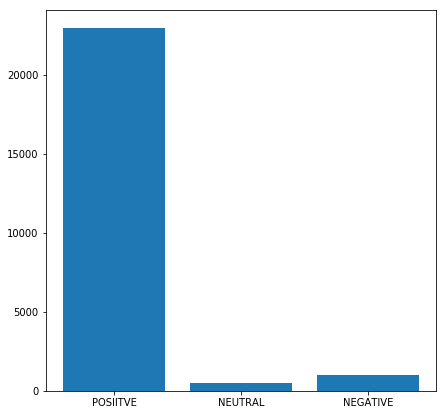

In [102]:
class_ = ["POSIITVE","NEUTRAL","NEGATIVE"]
data = [train_y.count("POSITIVE"),train_y.count("NEUTRAL"),train_y.count("NEGATIVE")]
plt.figure(figsize = (7,7))
plt.bar(class_,data)

$\underline{\text{Note}}$ There are so many positive review cases than negative and neutral. Sign of a problem? We shall see.

### Split data into training and test set

In [103]:
from sklearn.model_selection import train_test_split

training, test = train_test_split(reviews, test_size=0.33, random_state=42)


In [104]:
train_x,train_y = [x.text for x in training],[x.sentiment for x in training]
test_x,test_y = [x.text for x in test],[x.sentiment for x in test]

In [105]:
print(train_y.count(Sentiment.POSITIVE))
print(train_y.count(Sentiment.NEGATIVE))
print(train_y.count(Sentiment.NEUTRAL))

22936
1005
484


In [106]:
print(test_y.count(Sentiment.POSITIVE))
print(test_y.count(Sentiment.NEGATIVE))
print(test_y.count(Sentiment.NEUTRAL))

11250
549
232


### Vectorization of bags of of words

In [107]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# This book is great !
# This book was so bad

vectorizer = TfidfVectorizer()
train_x_vectors = vectorizer.fit_transform(train_x)

test_x_vectors = vectorizer.transform(test_x)

print(train_x[10])
print(train_x_vectors[10])
print(train_x_vectors[10].toarray())

Amazing service by worldremit...I made a transaction to India.within 2 hrs,money is deposited in overseas bank .kool app as well.Thanks to worldremit.
  (0, 10673)	0.17413772033449798
  (0, 1054)	0.170899652215215
  (0, 6196)	0.45009949860764853
  (0, 7669)	0.22973287945984072
  (0, 3175)	0.29225905678191416
  (0, 5433)	0.3227932654074013
  (0, 11967)	0.1975097869785641
  (0, 5678)	0.2664108808908731
  (0, 10983)	0.1554885718775329
  (0, 6605)	0.2103473224278881
  (0, 1910)	0.19008955122141333
  (0, 913)	0.2204835020642411
  (0, 9662)	0.09175684419914672
  (0, 1434)	0.17791637397595902
  (0, 12050)	0.26174203222131653
  (0, 10862)	0.15825197448229356
  (0, 5939)	0.10391330114351595
  (0, 11814)	0.1945393524169175
  (0, 1185)	0.1652196228067819
  (0, 5611)	0.1200096242234869
  (0, 7001)	0.09147503318747738
[[0. 0. 0. ... 0. 0. 0.]]


# Fitting different classifiers and making Random predictions

### 1) Support Vector Machine with a Linear Kernel

516
Loved the service... Was updated with regular mails and really felt good that transferring money to india was so easy... Thanks a lot and keep up the good work
Actual: POSITIVE
Prediction ['POSITIVE']


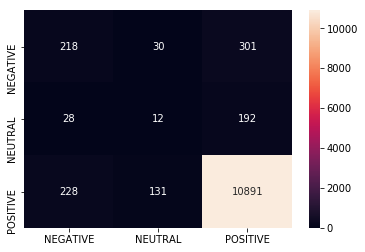

In [113]:
#train SVM classifier
clf_svm = svm.SVC(kernel='linear')

clf_svm.fit(train_x_vectors, train_y)
#random prediction using SVM

i = np.random.randint(0,1000)
print(i)
print(test_x[i])
print("Actual:",test_y[i])
print("Prediction",clf_svm.predict(test_x_vectors[i]))

#confusion matrix  for SVM - you can have the confusion matrices for the other classifiers
labels = ["NEGATIVE","NEUTRAL","POSITIVE"]
pred_svm = clf_gnb.predict(test_x_vectors)
cm =confusion_matrix(test_y,pred_svm)

df_cm = pd.DataFrame(cm, index=labels, columns=labels)

sb.heatmap(df_cm, annot=True, fmt='d') #truth is on "y" and predicted is on "x".

### 2) Decision Tree

In [13]:


clf_dec = DecisionTreeClassifier()
clf_dec.fit(train_x_vectors, train_y)

i = np.random.randint(0,1000)
print(i)
print(test_x[i])
print("Actual:",test_y[i])
print("Prediction",clf_dec.predict(test_x_vectors[0]))



597
The call centre took 45 mns to answer my call.
Actual: NEGATIVE
Prediction ['POSITIVE']


### 3) Naive Bayes

In [14]:

clf_gnb = DecisionTreeClassifier()
clf_gnb.fit(train_x_vectors, train_y)

clf_gnb.predict(test_x_vectors[0])


i = np.random.randint(0,1000)
print(i)
print(test_x[i])
print("Actual:",test_y[i])
print("Prediction",clf_gnb.predict(test_x_vectors[0]))



55
Very good good good good
Actual: POSITIVE
Prediction ['POSITIVE']


### 4) Logistic Regression

In [17]:
clf_log = LogisticRegression()
clf_log.fit(train_x_vectors, train_y)

clf_log.predict(test_x_vectors[0])


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


array(['POSITIVE'], dtype='<U8')

# Evaluation Metrics

### Mean Accuracy

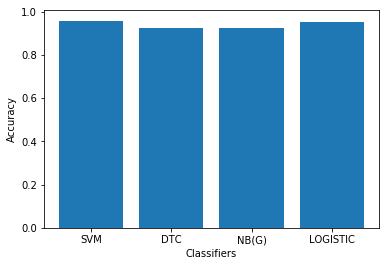

<Figure size 504x504 with 0 Axes>

0.9579419832100408
0.9253594879893609
0.9243620646662788
0.9531211038151443


In [52]:
classifiers = ["SVM","DTC","NB(G)","LOGISTIC"]

svm_score = clf_svm.score(test_x_vectors, test_y)

dtc_score = clf_dec.score(test_x_vectors, test_y)

nbg_score = clf_gnb.score(test_x_vectors, test_y)

logistic_score = clf_log.score(test_x_vectors, test_y)

scores =[svm_score,dtc_score,nbg_score,logistic_score ]

plt.bar(classifiers,scores)
plt.xlabel("Classifiers")
plt.ylabel("Accuracy")
plt.figure(figsize=(7,7))
plt.show()

print(svm_score)
print(dtc_score)
print(nbg_score)
print(logistic_score )



# A problem

### We're are getting accuracy above 90, is that right?

The answer is no. The data is imbalance and using accuracy as evalution
metric is not a good idea (on a light not - the problem could be something else). Recall that we have 11250 positive,549 negative and 232 neutral reviews. A total of 12031 reviews used in testing set ($0.33\times36456$).

Case example: If the classifier predicts all positive reviews correctly and none for negative and neutral reviews then the accuracy is $$\frac{11250}{12031} = 0.935 = 93.5\% !!!!!!! $$

This means that our model will be 93.5% accurate and we will think that the model is good but in reality the model "just knows best" how the predict one class (positive reviews). To understand this let us check the f1 score below?

After seeing the f1 score it is clear that the models are just good on predicting the positives? This is the problem witht data. There are so many positive cases that the negative ones or neutral.

In [21]:
22936+1005+484

24425

[0.97901305 0.         0.67178924]
[0.96289425 0.07179487 0.42553191]
[0.96235752 0.05925926 0.42619746]
[0.9761677  0.         0.58373206]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/lib/python3/dist-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


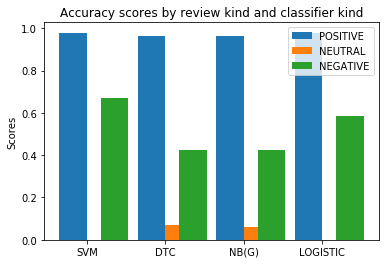

In [95]:
# F1 Scores

#calculating f1 score
f1_svm =(f1_score(test_y, clf_svm.predict(test_x_vectors), average=None, 
                  labels=[Sentiment.POSITIVE, Sentiment.NEUTRAL, Sentiment.NEGATIVE]))
f1_dtc = (f1_score(test_y, clf_dec.predict(test_x_vectors), average=None, 
                   labels=[Sentiment.POSITIVE, Sentiment.NEUTRAL, Sentiment.NEGATIVE]))
f1_nb = (f1_score(test_y, clf_gnb.predict(test_x_vectors), average=None, 
                  labels=[Sentiment.POSITIVE, Sentiment.NEUTRAL, Sentiment.NEGATIVE]))

f1_logistic = (f1_score(test_y, clf_log.predict(test_x_vectors), average=None, 
                        labels=[Sentiment.POSITIVE, Sentiment.NEUTRAL, Sentiment.NEGATIVE]))

# plotting f1 scores

classifiers = ["SVM","DTC","NB","TT"]
f1_svm_,f1_dtc_,f1_nb_,f1_logistic_ = list(f1_svm),list(f1_dtc),list(f1_nb),list(f1_logistic)
data = []
for i,j,k,l in zip(f1_svm_,f1_dtc_,f1_nb_,f1_logistic_):
    data.append([i,j,k,l])
    
x = np.arange(len(classifiers))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, data[0], width, label='POSITIVE')
rects2 = ax.bar(x + width/2, data[1], width, label='NEUTRAL')
rects3 = ax.bar(x + width, data[2], width, label='NEGATIVE')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('F1 scores by review kind and classifier kind')
ax.set_xticks(x)
ax.set_xticklabels(classfiers)
ax.legend()
fig.show()

#print f1 scores
print(f1_svm)
print(f1_dtc)
print(f1_nb)
print(f1_logistic)


# Probable solution to the problem

The solution to the problem we have is notebook: $\underline{\text{Classifications -  ML comparison_1.ipynb}}$